##### The datasets are from a companion website for the book Modeling Online Auctions, by Wolfgang Jank and Galit Shmueli (Wiley and Sons, ISBN: 978-0-470-47565-2, July 2010).

## Goal for the analysis:
### Find out the relationship between bids, auction type and open bid. Does this differ by type of items?

In [2]:
%matplotlib inline 

import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 
import seaborn as sns           # graphics 
import datetime as dt           # date tools, used to note current date  
import numpy as np
from scipy import stats

### Read csv file 

In [3]:

auction=pd.read_csv("auction.csv")
auction.head()


,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


In [4]:
auction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 9 columns):
auctionid       10681 non-null int64
bid             10681 non-null float64
bidtime         10681 non-null float64
bidder          10665 non-null object
bidderrate      10670 non-null float64
openbid         10681 non-null float64
price           10681 non-null float64
item            10681 non-null object
auction_type    10681 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 751.1+ KB


In [5]:
auction.shape

(10681, 9)

In [6]:
auction.dtypes

auctionid         int64
bid             float64
bidtime         float64
bidder           object
bidderrate      float64
openbid         float64
price           float64
item             object
auction_type     object
dtype: object

#### The data set includes 10681 observations and 9 variables

## Part 1 Understand eBay auction policy
### It's important to understand how eBay auction policy works before conducting further analysis. I found this explanation easy to understand.

>The website helps to answer the following questions:

### What's the relationship between bids and bidtime? 
>Poeple have to bid higher than current price, which is the second highest bid+increment. If someone places a bid much higher than current price, eBay will only use part of his/her bid(second highest bid+increment) as the new current price. People can bid as long as their bid is higher than current price. Therefore, as bidtime increases, we sometimes see bids that are lower than previous bids. People will be notified when they are outbid, so they may increase their max bids to remain the higher bidder.

### What's the relationship between bids and closing price? 
>Closing price=second highest bid+increment or highest bid in some cases when second highest bid+increment is greater than the thrid highest bid. For example, if third highest bid is 8 and second highest bid is 10, you can bid 10.01 and if no one's bid is higher than yours, you get the item by paying 10.01 instead of 10+increment(which is 10.5)

### Person who placed the highest bid gets the item but how much he/she needs to pay in most cases depends on the second highest bid.

In [7]:
auction.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


In [8]:
auction4=auction[['auctionid','bid','price','auction_type']]

In [9]:
auction4.head()

,auctionid,bid,price,auction_type
0,1638893549,175.0,177.5,3 day auction
1,1638893549,100.0,177.5,3 day auction
2,1638893549,120.0,177.5,3 day auction
3,1638893549,150.0,177.5,3 day auction
4,1638893549,177.5,177.5,3 day auction


In [10]:
closing_price = auction4.groupby(['auctionid']).last()

In [11]:
closing_price.head()

,bid,price,auction_type
auctionid,,,
1638843936,1625.0,1625.0,7 day auction
1638844284,500.0,500.0,7 day auction
1638844464,740.0,740.0,7 day auction
1638844729,320.0,320.0,7 day auction
1638893549,177.5,177.5,3 day auction


In [12]:
closing_price['check']=np.where((closing_price['bid'] == closing_price['price']), closing_price['bid'], np.nan)

In [13]:
closing_price.head()

,bid,price,auction_type,check
auctionid,,,,
1638843936,1625.0,1625.0,7 day auction,1625.0
1638844284,500.0,500.0,7 day auction,500.0
1638844464,740.0,740.0,7 day auction,740.0
1638844729,320.0,320.0,7 day auction,320.0
1638893549,177.5,177.5,3 day auction,177.5


In [14]:
closing_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 1638843936 to 8215610555
Data columns (total 4 columns):
bid             628 non-null float64
price           628 non-null float64
auction_type    628 non-null object
check           482 non-null float64
dtypes: float64(3), object(1)
memory usage: 24.5+ KB


In [15]:
closing_price.check.count()

482

In [16]:
closing_price.isnull().sum()

bid               0
price             0
auction_type      0
check           146
dtype: int64

In [17]:
closing_price.shape

(628, 4)

In [18]:
1-146/628

0.7675159235668789

### 76.8% of bids placed right before the auction ends is the same as the closing price but people who place the last bid is not necessaily the one who get the item.

## Part 2 Data Exploration
#Let's find how many days does an auction usually take?

In [19]:
auction1 = auction[['auctionid','bidtime']]

In [20]:
auction1.head()

,auctionid,bidtime
0,1638893549,2.230949
1,1638893549,2.600116
2,1638893549,2.600810
3,1638893549,2.601076
4,1638893549,2.909826


In [21]:
max_bidtime = auction1.groupby(['auctionid']).max()

In [22]:
max_bidtime.head()

,bidtime
auctionid,
1638843936,6.893113
1638844284,1.252407
1638844464,6.999745
1638844729,6.999213
1638893549,2.909826


/Users/rajusunkara/Documents/anakonda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


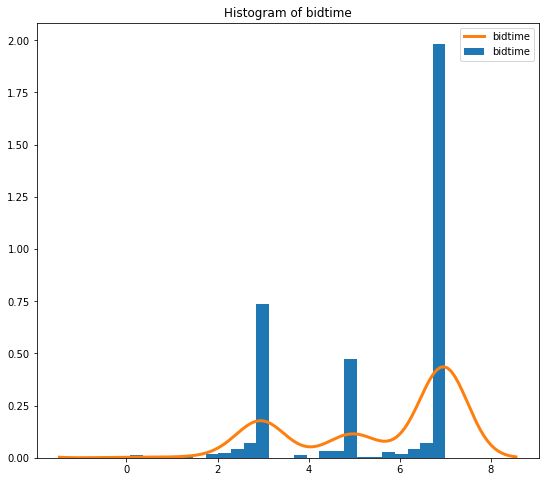

In [23]:
# when normed=True, sum of bin height*width for all bins=1

fig, ax = plt.subplots(figsize = (9, 8))
ax.hist(max_bidtime['bidtime'], bins=25, normed=True)
sns.kdeplot(max_bidtime['bidtime'], ax=ax, lw = 3)
ax.set_title("Histogram of bidtime")
plt.show()

>** From the kernel density distribution above, we can see that it is most likely that auctions will take 7 days and then 3 days and 5 days. As is shown below, most auction types are 7 days. And this corresponds to the likihood of days most auctions**

## 2.2 Analysis of bidtime for different acution_types

In [24]:
auction.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


### Number of unique acutions for different auction types

In [25]:
num_type=auction.groupby('auction_type')['auctionid'].nunique()
num_type=num_type.to_frame()
print(num_type)

               auctionid
auction_type            
3 day auction        148
5 day auction         96
7 day auction        384


#### Plot to see the Auction days

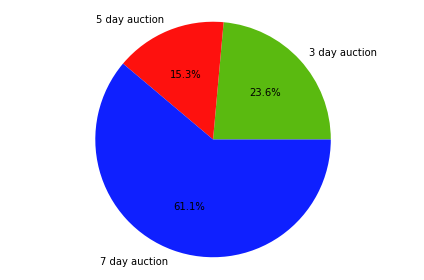

In [26]:
# Create a list of colors (from iWantHue)
colors=['#5ABA10', '#FE110E','#0f20ff']
# Create a pie chart
plt.pie(
    # using data total)arrests
    num_type['auctionid'],
    # with the labels being officer names
    labels=num_type.index,
    # with no shadows
    shadow=False,
    # with colors
   colors=colors,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

### A pie chart showing the percentage composition of different auction types. 
### From the plot, we can see that **61% percent of the auctions are 7 day auction**.

### Max bidtime for each unique auction
>Let's compare the distribution of max bidtime for three auction types. To achieve this, I used the max bidtime for each auctionid calculated above and then merge it with auction_type. Therefore, I get auction_type and max bidtime for each unique auction.

### Create a Sub Dataset 

In [27]:
max_bidtime=auction.groupby('auctionid',as_index=False)['bidtime'].max()

In [28]:
max_bidtime.head()

,auctionid,bidtime
0,1638843936,6.893113
1,1638844284,1.252407
2,1638844464,6.999745
3,1638844729,6.999213
4,1638893549,2.909826


In [29]:
max_bidtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 2 columns):
auctionid    628 non-null int64
bidtime      628 non-null float64
dtypes: float64(1), int64(1)
memory usage: 14.7 KB


### Create a Sub Dataset 

In [30]:
auction2 = auction[['auctionid','auction_type']]

In [31]:
auction_type=auction2.groupby('auctionid',as_index=False)['auction_type'].first()

In [32]:
auction_type.head()

,auctionid,auction_type
0,1638843936,7 day auction
1,1638844284,7 day auction
2,1638844464,7 day auction
3,1638844729,7 day auction
4,1638893549,3 day auction


In [33]:
auction_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 2 columns):
auctionid       628 non-null int64
auction_type    628 non-null object
dtypes: int64(1), object(1)
memory usage: 14.7+ KB


### Create a Sub Dataset  By Clubbing both datasets

In [34]:
auction3 = pd.merge(max_bidtime, auction_type, how='inner', on=['auctionid'])

In [35]:
auction3.head()

,auctionid,bidtime,auction_type
0,1638843936,6.893113,7 day auction
1,1638844284,1.252407,7 day auction
2,1638844464,6.999745,7 day auction
3,1638844729,6.999213,7 day auction
4,1638893549,2.909826,3 day auction


In [36]:
auction3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 3 columns):
auctionid       628 non-null int64
bidtime         628 non-null float64
auction_type    628 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 19.6+ KB


In [37]:
seven_day_auction = auction3.query('auction_type == "7 day auction"') 
five_day_auction= auction3.query('auction_type == "5 day auction"') 
three_day_auction= auction3.query('auction_type == "3 day auction"')

In [38]:
print(three_day_auction.shape,five_day_auction.shape,seven_day_auction.shape)

(148, 3) (96, 3) (384, 3)


/Users/rajusunkara/Documents/anakonda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/rajusunkara/Documents/anakonda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/rajusunkara/Documents/anakonda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


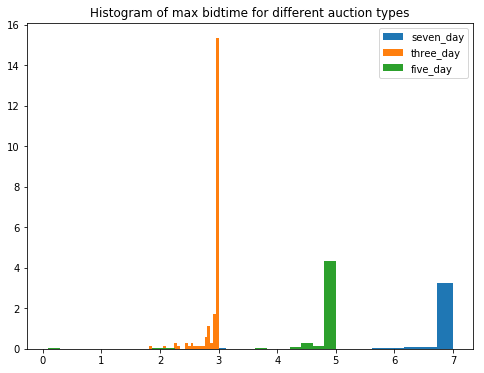

In [39]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.hist(seven_day_auction['bidtime'], bins=25, normed=True,label='seven_day')
ax.hist(three_day_auction['bidtime'], bins=25, normed=True,label='three_day')
ax.hist(five_day_auction['bidtime'], bins=25, normed=True,label='five_day')
ax.set_title("Histogram of max bidtime for different auction types")
plt.legend()
plt.show()

### From the plot above, we can see that <font color ='green'> the ultimate bid time for most auctions are the same as maximun days that they are availbale</font>.

## 2.3 Analysis of open bid
>Does different items statistically different in average open bid?

>Does different auction types statistically different in average open bid?

In [40]:
auction.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


In [41]:
open_bid = auction.groupby(['auctionid']).last()
open_bid=open_bid[['openbid','item','auction_type']]
open_bid.head()

,openbid,item,auction_type
auctionid,,,
1638843936,500.0,Cartier wristwatch,7 day auction
1638844284,200.0,Cartier wristwatch,7 day auction
1638844464,300.0,Cartier wristwatch,7 day auction
1638844729,225.0,Cartier wristwatch,7 day auction
1638893549,99.0,Cartier wristwatch,3 day auction


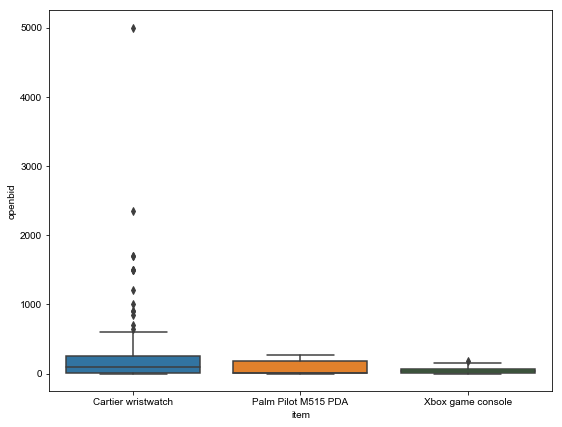

In [42]:
#create a boxplot first in order to have a more direct way of seeing means of open bid for different types
bx = plt.subplots(figsize = (9, 7))
sns.set_style("whitegrid")
bx = sns.boxplot(x="item", y="openbid", data=open_bid)

In [43]:
df=open_bid[open_bid['item']=='Cartier wristwatch']['openbid']
df.max()

5000.0

In [44]:
df.head()

auctionid
1638843936    500.0
1638844284    200.0
1638844464    300.0
1638844729    225.0
1638893549     99.0
Name: openbid, dtype: float64

In [45]:
df.shape

(136,)

### We can see that there's a Cartier wristwatch with an open bid of 5,000, which I think is very likely to bias my analysis of open bid. Therefore, I'm going to exclude that observation. ** I'm not quite sure if I should do this though. I would appreciate your suggestion.**

In [46]:
#drop the row that has openbid=5000.0
value_list = [5000.0]
open_bid1=open_bid[~open_bid.openbid.isin(value_list)]
open_bid1.head()

,openbid,item,auction_type
auctionid,,,
1638843936,500.0,Cartier wristwatch,7 day auction
1638844284,200.0,Cartier wristwatch,7 day auction
1638844464,300.0,Cartier wristwatch,7 day auction
1638844729,225.0,Cartier wristwatch,7 day auction
1638893549,99.0,Cartier wristwatch,3 day auction


### Distribution plot
>Introduction of sns.displot function: 'sns.displot function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn :func:kdeplotand :func:rugplot functions.)'

/Users/rajusunkara/Documents/anakonda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/rajusunkara/Documents/anakonda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rajusunkara/Documents/anakonda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


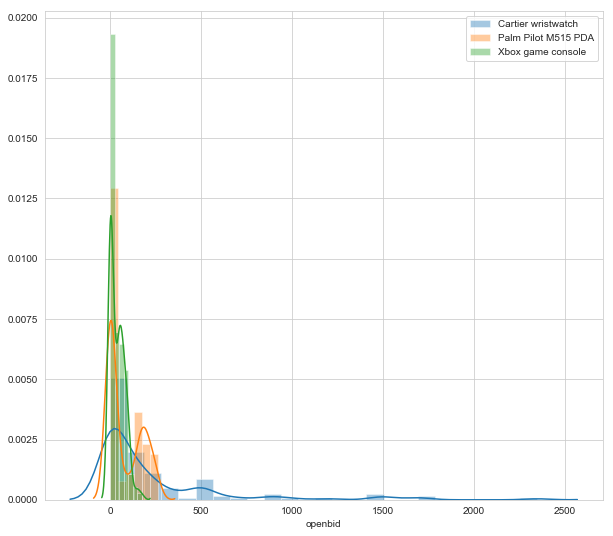

In [47]:
fig, ax = plt.subplots(figsize = (10, 9))
sns.distplot(open_bid1[open_bid['item']=='Cartier wristwatch']['openbid'], kde=True,label="Cartier wristwatch")
sns.distplot(open_bid1[open_bid['item']=='Palm Pilot M515 PDA']['openbid'], kde=True,label="Palm Pilot M515 PDA")
sns.distplot(open_bid1[open_bid['item']=='Xbox game console']['openbid'], kde=True,label='Xbox game console')
plt.legend()

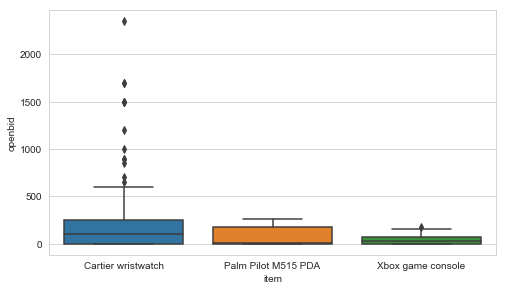

In [48]:
fig, ax = plt.subplots(figsize = (8, 4.5))
ax = sns.boxplot(x="item", y="openbid", data=open_bid1)

[(-20, 1000)]

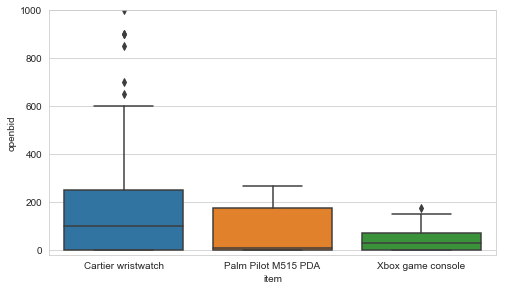

In [49]:
fig, ax = plt.subplots(figsize = (8, 4.5))
ax = sns.boxplot(x="item", y="openbid", data=open_bid1)
ax.set(ylim=(-20, 1000))

>Since the distribution of open bid for Cartier wristwatch is skewed to the right, a median comparison of open bid price for different types of items is better.

In [50]:
open_bid1.groupby('item')['openbid'].median()

item
Cartier wristwatch     99.00
Palm Pilot M515 PDA     9.99
Xbox game console      29.99
Name: openbid, dtype: float64

In [51]:
open_bid1.groupby('item')['openbid'].mean()

item
Cartier wristwatch     231.961630
Palm Pilot M515 PDA     77.245044
Xbox game console       39.319060
Name: openbid, dtype: float64

In [52]:
open_bid1.groupby('item')['openbid'].var()

item
Cartier wristwatch     159414.387191
Palm Pilot M515 PDA      8409.336510
Xbox game console        1520.883494
Name: openbid, dtype: float64

### We're going to use Anova test to see if different items/aution types have significant difference in open bid.

## One way ANOVA

In [53]:
# compute one-way ANOVA P value   
from scipy import stats  
watch=open_bid1[open_bid1['item']=='Cartier wristwatch']['openbid']
PDA=open_bid1[open_bid1['item']=='Palm Pilot M515 PDA']['openbid']
console=open_bid1[open_bid1['item']=='Xbox game console']['openbid']

f_val, p_val = stats.f_oneway(watch, PDA, console)  
  
print("One-way ANOVA P =", p_val)

One-way ANOVA P = 8.970577459154614e-17


>With a p-value less than 0.05, we are confident enough to conclude that **differnt types of items are statistically different in average open bid**.

>From the boxplot and analysis above, we can see that **Cartier wristwatch has a much higher median open bid than Palm Pilot and Xbox game console.The distribution of open bid for Cartier wristwatch is more disperse as well. **

In [54]:
seven_days=open_bid1[open_bid1['auction_type']=='7 day auction']['openbid']
five_days=open_bid1[open_bid1['auction_type']=='5 day auction']['openbid']
three_days=open_bid1[open_bid1['auction_type']=='3 day auction']['openbid']

f_val, p_val = stats.f_oneway(seven_days, five_days, three_days)  
  
print("One-way ANOVA P =", p_val)

One-way ANOVA P = 0.21555161920800445


### With a p-value greater than 0.05, we failed to reject that items with differnt aution types are statistically differnt in open bid. **Different auction types are not statistically different in average open bid.**

## 2.4 Analysis of ending price

In [55]:
pct_change=auction[['auctionid','openbid','price','item','auction_type']].groupby(['auctionid']).last()
pct_change.head()

,openbid,price,item,auction_type
auctionid,,,,
1638843936,500.0,1625.0,Cartier wristwatch,7 day auction
1638844284,200.0,500.0,Cartier wristwatch,7 day auction
1638844464,300.0,740.0,Cartier wristwatch,7 day auction
1638844729,225.0,320.0,Cartier wristwatch,7 day auction
1638893549,99.0,177.5,Cartier wristwatch,3 day auction


In [56]:
pct_change.groupby('item')['price'].median()

item
Cartier wristwatch     510.00
Palm Pilot M515 PDA    231.50
Xbox game console      123.15
Name: price, dtype: float64

In [57]:
pct_change.groupby('item')['price'].mean()

item
Cartier wristwatch     884.557353
Palm Pilot M515 PDA    229.083586
Xbox game console      131.414027
Name: price, dtype: float64

In [58]:
pct_change.groupby('item')['price'].var()

item
Cartier wristwatch     692948.065759
Palm Pilot M515 PDA       482.505232
Xbox game console        4036.669581
Name: price, dtype: float64

## Part 3 Relation between variables
>From the perspective of sellers, to attract more bids and generate more percentage increase in price, they want to know

 -how long should they set their auction
 
 -how they should set their open bid

### 3.1 Is there any relationship between open bid and bid times?
>Does a lower opening bid set by the seller attract more bids on the auction?

#### Correlation coefficient

>Is a lower open bid correlated with more people placing a bid on the item?

In [59]:
auction.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


### num_bidds refers to the number of bids an auction has during its auction period.

In [60]:
num_bids=auction.groupby('auctionid')['bidder'].count()
num_bids=num_bids.to_frame()
num_bids.columns=['num_bids']
num_bids.head()

,num_bids
auctionid,
1638843936,7
1638844284,2
1638844464,16
1638844729,11
1638893549,5


In [61]:
num_bids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 1638843936 to 8215610555
Data columns (total 1 columns):
num_bids    628 non-null int64
dtypes: int64(1)
memory usage: 9.8 KB


In [62]:
#open_bid1 is a dataframe that drops the extreme openbid value of 5,000
open_bid1.head()

,openbid,item,auction_type
auctionid,,,
1638843936,500.0,Cartier wristwatch,7 day auction
1638844284,200.0,Cartier wristwatch,7 day auction
1638844464,300.0,Cartier wristwatch,7 day auction
1638844729,225.0,Cartier wristwatch,7 day auction
1638893549,99.0,Cartier wristwatch,3 day auction


In [63]:
num_bids=pd.merge(num_bids, open_bid1, left_index=True, right_index=True)

In [64]:
num_bids.tail()

,num_bids,openbid,item,auction_type
auctionid,,,,
8215558653,14,55.00,Xbox game console,3 day auction
8215571039,20,50.00,Xbox game console,3 day auction
8215582227,16,60.00,Xbox game console,3 day auction
8215605488,11,0.99,Xbox game console,3 day auction
8215610555,14,5.00,Xbox game console,3 day auction


In [65]:
watch=num_bids[num_bids['item']=='Cartier wristwatch']
xbox=num_bids[num_bids['item']=='Xbox game console']
PDA=num_bids[num_bids['item']=='Palm Pilot M515 PDA']

#### Since from the scatter plot, I noticed that the relation between num_bids and open bid for different tyes of itmes are not linear, Spearman's correlation is more appropriate for measuring increasing or decreasing trends.

/Users/rajusunkara/Documents/anakonda/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


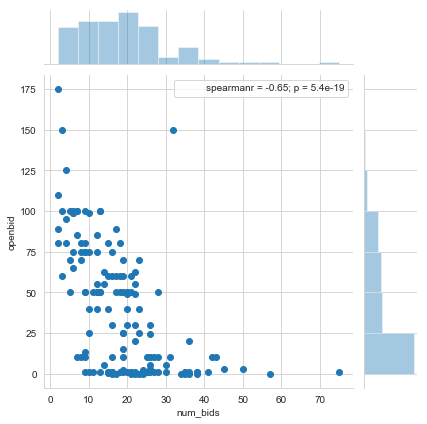

In [67]:
from scipy.stats import spearmanr
g = sns.jointplot(x='num_bids', y="openbid", data=xbox,stat_func=spearmanr)

/Users/rajusunkara/Documents/anakonda/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


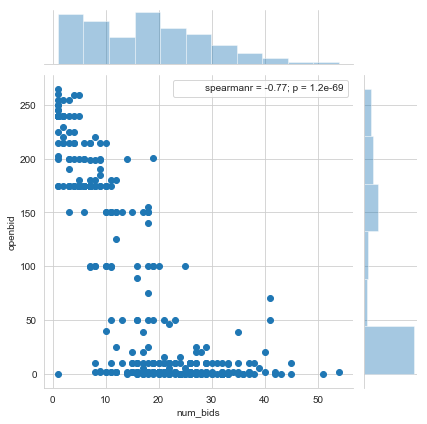

In [69]:
g = sns.jointplot(x='num_bids', y="openbid", data=PDA,stat_func=spearmanr)

#### In gneral, number of bids is strongly negatively correlated with open bid price set by the seller, with a spearmanr correlation coefficient of -0.71. That is to say, **an auction with high open bid tends to attract fewer bids**.

>Besides, spearman correlation for watch is the weakest and strongest for PDA, which may be a result of outliers or larger variation in watch as well.

In [71]:
num_bids.groupby('item').corr()

num_bids   openbid
item                                            
Cartier wristwatch  num_bids  1.000000 -0.361051
                    openbid  -0.361051  1.000000
Palm Pilot M515 PDA num_bids  1.000000 -0.775424
                    openbid  -0.775424  1.000000
Xbox game console   num_bids  1.000000 -0.575937
                    openbid  -0.575937  1.000000

>**Correlation of number of bidders with open bid is the strongest for Palm Pilot and weakest for Cartier wristwatch. **

In [72]:
num_bids.groupby('auction_type').corr(method='spearman')

num_bids   openbid
auction_type                              
3 day auction num_bids  1.000000 -0.740512
              openbid  -0.740512  1.000000
5 day auction num_bids  1.000000 -0.653502
              openbid  -0.653502  1.000000
7 day auction num_bids  1.000000 -0.666724
              openbid  -0.666724  1.000000

> **Differences of correlation between open bid and number of bidders are less significant among differnt auction types.**

In [74]:
num_bids.groupby(['auction_type','item']).corr(method='spearman')

num_bids   openbid
auction_type  item                                            
3 day auction Cartier wristwatch  num_bids  1.000000 -0.132814
                                  openbid  -0.132814  1.000000
              Palm Pilot M515 PDA num_bids  1.000000 -0.794222
                                  openbid  -0.794222  1.000000
              Xbox game console   num_bids  1.000000 -0.777692
                                  openbid  -0.777692  1.000000
5 day auction Cartier wristwatch  num_bids  1.000000 -0.494764
                                  openbid  -0.494764  1.000000
              Palm Pilot M515 PDA num_bids  1.000000 -0.779264
                                  openbid  -0.779264  1.000000
              Xbox game console   num_bids  1.000000 -0.524314
                                  openbid  -0.524314  1.000000
7 day auction Cartier wristwatch  num_bids  1.000000 -0.580718
                                  openbid  -0.580718  1.000000
              Palm Pilot M515 PDA num_bids  1.000000 -0.661140
                                  openbid  -0.661140  1.000000
              Xbox game console   num_bids  1.000000 -0.635826
                                  openbid  -0.635826  1.000000

### 3.2 What's the relationship between auction types and number of bids?
As shown before

-Auctions with lower open bid tend to have a larger number of bids

-Different auction types are not statistically different in open bid
>I would like to see whether the choice of auction type per se wil affect number of bids

In [75]:
num_bids.head()

,num_bids,openbid,item,auction_type
auctionid,,,,
1638843936,7,500.0,Cartier wristwatch,7 day auction
1638844284,2,200.0,Cartier wristwatch,7 day auction
1638844464,16,300.0,Cartier wristwatch,7 day auction
1638844729,11,225.0,Cartier wristwatch,7 day auction
1638893549,5,99.0,Cartier wristwatch,3 day auction


In [76]:
#number of auctions for each auction type 
num_bids.groupby('auction_type')['num_bids'].count()

auction_type
3 day auction    148
5 day auction     96
7 day auction    383
Name: num_bids, dtype: int64

In [77]:
#total number of bids for each auction type 
num_bids.groupby('auction_type')['num_bids'].sum()

auction_type
3 day auction    2019
5 day auction    1617
7 day auction    7025
Name: num_bids, dtype: int64

In [78]:
#averge number of bids for each type of auctions 
num_bids.groupby('auction_type')['num_bids'].sum()/num_bids.groupby('auction_type')['num_bids'].count()

auction_type
3 day auction    13.641892
5 day auction    16.843750
7 day auction    18.342037
Name: num_bids, dtype: float64

**We can see that auctions with longer days available have more bids on average. **

>Is longer auction time positively correlated with more bids for each type of items?

In [79]:
ave_bids=num_bids.groupby(['auction_type','item'])['num_bids'].sum()/num_bids.groupby(['auction_type','item'])['num_bids'].count()

In [80]:
ave_bids=ave_bids.to_frame()

In [81]:
ave_bids

num_bids
auction_type  item                          
3 day auction Cartier wristwatch   13.888889
              Palm Pilot M515 PDA  12.800000
              Xbox game console    15.800000
5 day auction Cartier wristwatch   16.904762
              Palm Pilot M515 PDA  16.092593
              Xbox game console    18.714286
7 day auction Cartier wristwatch   14.000000
              Palm Pilot M515 PDA  19.752577
              Xbox game console    19.881720

In [82]:
ave_bids1=ave_bids.reset_index(level=['auction_type','item'])
ave_bids1

,auction_type,item,num_bids
0,3 day auction,Cartier wristwatch,13.888889
1,3 day auction,Palm Pilot M515 PDA,12.800000
2,3 day auction,Xbox game console,15.800000
3,5 day auction,Cartier wristwatch,16.904762
4,5 day auction,Palm Pilot M515 PDA,16.092593
5,5 day auction,Xbox game console,18.714286
6,7 day auction,Cartier wristwatch,14.000000
7,7 day auction,Palm Pilot M515 PDA,19.752577
8,7 day auction,Xbox game console,19.881720


In [84]:
ave_bids1.groupby(['item'])['num_bids'].var()

item
Cartier wristwatch      2.924246
Palm Pilot M515 PDA    12.095831
Xbox game console       4.419401
Name: num_bids, dtype: float64

**For Palm Pilot and Xbox console, a longer auction time is correlated with more bids, while for Cartier wristwatch, a longer auction does not necessarily correlated with more bids.**

## Part 4 Conclusion
>Based on the analysis above, we can conclude that in general, a lower open bid and longer auction time can attract more bids on an auction.

>However, if we take a deeper look into cases for different types of items, we can find that the relation between open bid, auction time and number of bids is not that strong (or even do not hold) for items like Cartier wristwatch.

### Possible explanation

>One possible explanation for this is the chareristics of different types of items. For items like Cartier wristwatch, which has a high disperse distribution of mean and median for both open bid and close price, these items sold on eBay are more likely to be rare and exclusive. Therefore, even if it's set at a high open bid and have limited auction price, it may still have quite a few bids.

>For items like Palm Pilot and Xbox game consoles, (I assume that) they are much less likely to be limited editions since the data are collected from a book published in 2010(http://www.modelingonlineauctions.com/home), Palm Pilot and Xbox game consoles were very unlikely to be rare products in the market. Therefore, the market for these products are more competitive and thus people like to bid on products with lower open bid.

### Tips for sellers on eBay

    -If you are selling a product that's hard to be found on the market and it has great collection value, you don't need to worry much that setting it at a high open bid and limited amount of aution time will scare potential customers away.

    -If you are selling a product which has quite a few substitues in the market, set it at a low open bid and make it a 7 day auction. You will attract more bidders by doing this. Since the market is competitive, I believe you won't end up having an unsatisfactory price.